In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv')

In [3]:
print(df.shape)

(3694, 14)


In [4]:
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [5]:
df.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


In [6]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

In [7]:
df['designer'].value_counts()

IKEA of Sweden                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              828
Ehlén Johansson                                                                                                                                         

In [8]:
df['old_price'].value_counts()

No old price    3040
SR 995            12
SR 1,385          11
SR 595            10
SR 275             8
                ... 
SR 2,225           1
SR 2,870           1
SR 885             1
SR 780             1
SR 2,360           1
Name: old_price, Length: 365, dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'item_id', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'link', 'other_colors', 'short_description',
       'designer', 'depth', 'height', 'width'],
      dtype='object')

In [10]:
del df['Unnamed: 0']
del df['item_id']
del df['old_price']
df['price'] = df['price'] / 3.75

In [11]:
df.head()

,name,category,price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,FREKVENS,Bar furniture,70.666667,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,NORDVIKEN,Bar furniture,265.333333,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,NORDVIKEN / NORDVIKEN,Bar furniture,558.666667,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,STIG,Bar furniture,18.400000,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,NORBERG,Bar furniture,60.000000,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [12]:
df = df[~(df['depth'].isnull() & df['height'].isnull() & df['width'].isnull())]

In [13]:
df.shape

(3277, 11)

In [14]:
categories = df['category'].value_counts()
top_categories = categories[(categories >= 100)].index.tolist()
df = df[df['category'].isin(top_categories)]

In [15]:
df['price_log1p'] = np.log1p(df['price'])

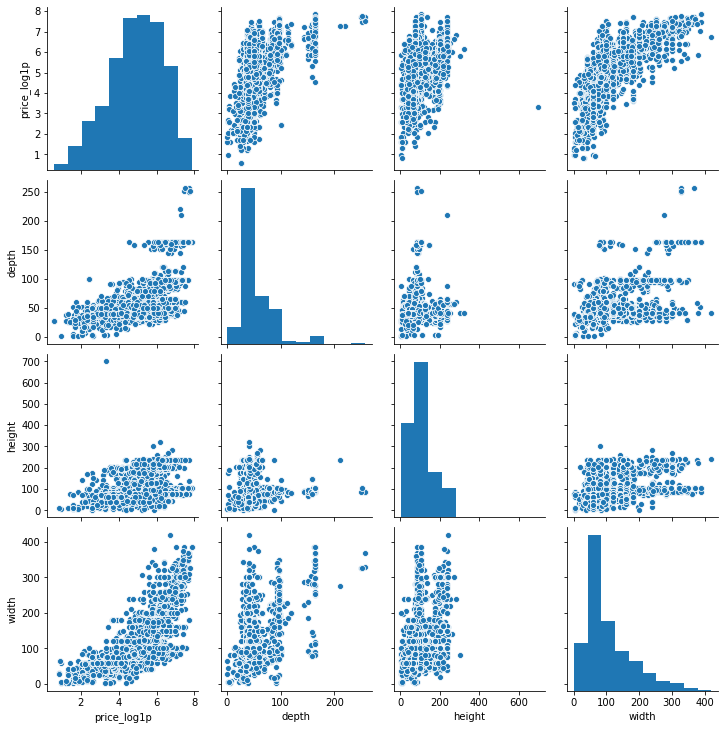

In [16]:
sns.pairplot(data=df, vars=['price_log1p', 'depth', 'height', 'width'])

In [17]:
df['volume'] = df['depth'] * df['width'] * df['height']
df['volume_log1p'] = np.log1p(df['volume'])

<AxesSubplot:xlabel='volume'>

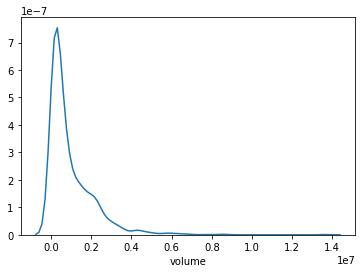

In [18]:
sns.distplot(df['volume'], hist=False)

<AxesSubplot:xlabel='volume_log1p', ylabel='price_log1p'>

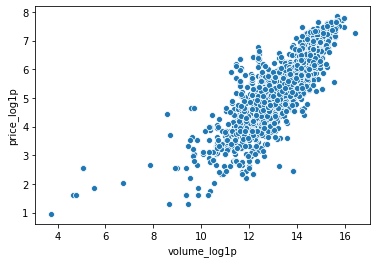

In [19]:
sns.scatterplot(data=df, x='volume_log1p', y='price_log1p')

In [20]:
from scipy.stats import pearsonr

In [21]:
not_nan_volume = ~df['volume'].isnull()

In [22]:
pearsonr(df[not_nan_volume]['volume_log1p'].values, df[not_nan_volume]['price_log1p'].values)

(0.8260087246774585, 0.0)

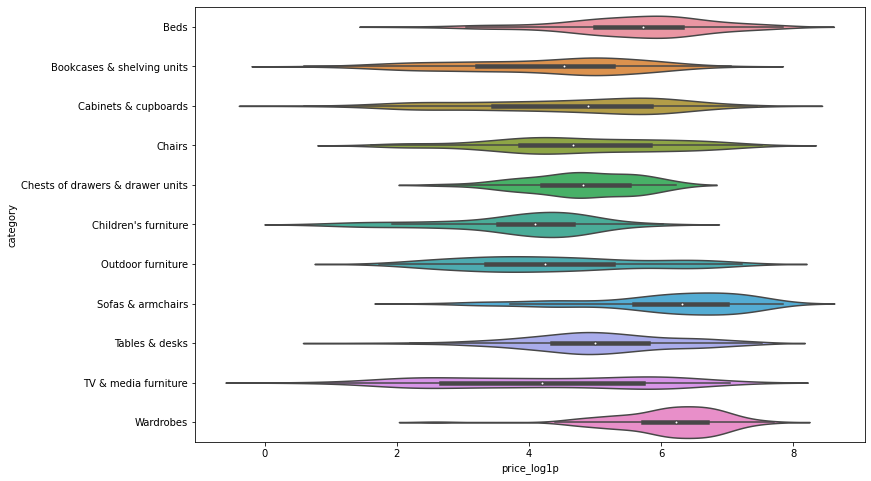

In [23]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='category', x='price_log1p')
plt.show()

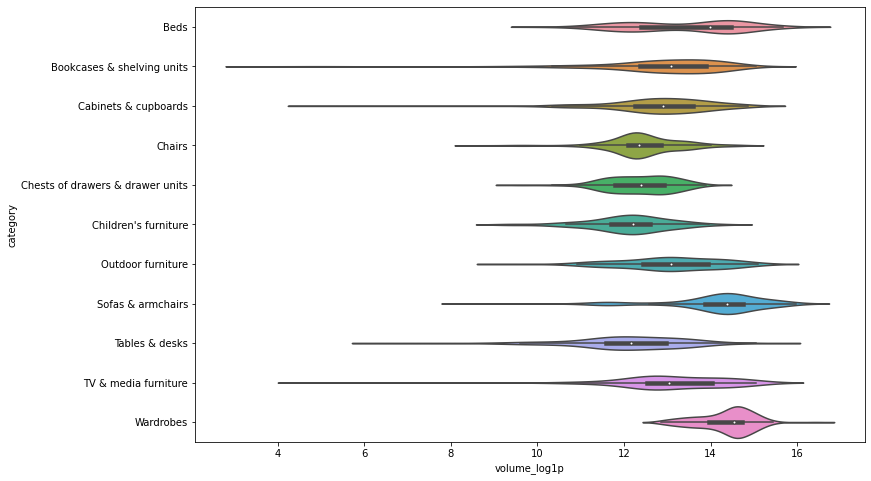

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='category', x='volume_log1p')
plt.show()

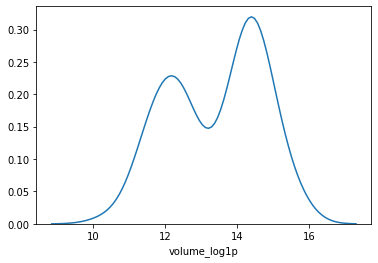

In [25]:
beds = df[df['category'] == 'Beds']
sns.distplot(beds['volume_log1p'], hist=False)
plt.show()

In [30]:
df['designer'].value_counts()[:20]

IKEA of Sweden                    708
Ola Wihlborg                      117
Jon Karlsson                      111
Francis Cayouette                 110
K Hagberg/M Hagberg               105
Ehlén Johansson                    87
Ehlén Johansson/IKEA of Sweden     69
IKEA of Sweden/Ehlén Johansson     66
Carina Bengs                       63
K Malmvall/E Lilja Löwenhielm      54
Henrik Preutz                      53
Eva Lilja Löwenhielm               43
Nike Karlsson                      42
Ebba Strandmark                    40
Studio Copenhagen                  32
Johan Kroon                        31
H Preutz/A Fredriksson             30
IKEA of Sweden/Jon Karlsson        27
Marcus Arvonen                     26
Andreas Fredriksson                26
Name: designer, dtype: int64

In [34]:
df['designer'] = df['designer'].str.replace('/IKEA of Sweden', '').str.replace('IKEA of Sweden/', '')

In [35]:
designers = df['designer'].value_counts()
top_designers = designers[designers >= 20].index.tolist()
df = df[df['designer'].isin(top_designers)]

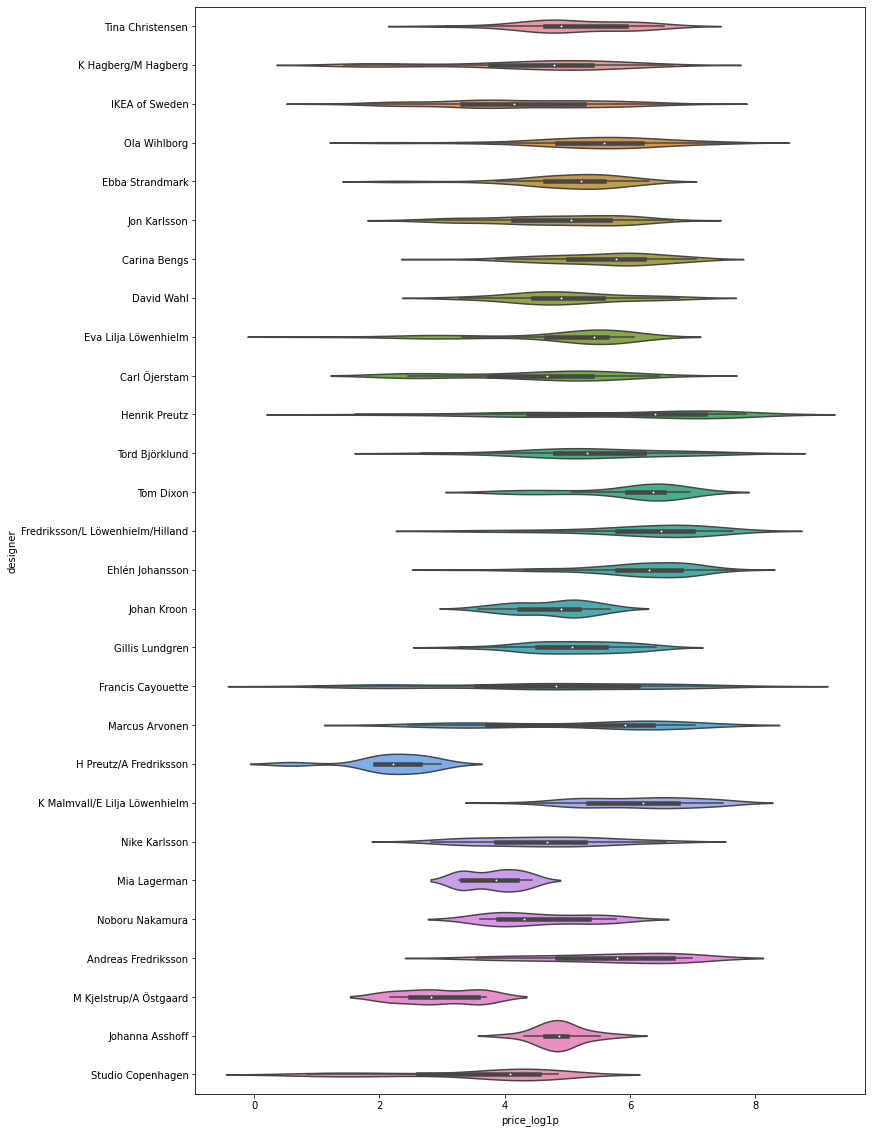

In [39]:
plt.figure(figsize=(12, 20))
sns.violinplot(data=df, y='designer', x='price_log1p')
plt.show()

In [125]:
categories_designers = (df.groupby(['category', 'designer']).
                        agg(count=('name', 'count')).reset_index().
                        pivot(index='category', columns='designer', values='count').fillna(0).astype(int))
categories_designers

designer,Andreas Fredriksson,Carina Bengs,Carl Öjerstam,David Wahl,Ebba Strandmark,Ehlén Johansson,Eva Lilja Löwenhielm,Francis Cayouette,Fredriksson/L Löwenhielm/Hilland,Gillis Lundgren,...,M Kjelstrup/A Östgaard,Marcus Arvonen,Mia Lagerman,Nike Karlsson,Noboru Nakamura,Ola Wihlborg,Studio Copenhagen,Tina Christensen,Tom Dixon,Tord Björklund
category,,,,,,,,,,,,,,,,,,,,,
Beds,0,10,2,2,20,8,7,0,6,0,...,0,0,0,0,0,7,0,2,8,6
Bookcases & shelving units,0,8,6,0,1,0,2,43,0,29,...,0,11,0,0,0,0,0,1,0,21
Cabinets & cupboards,0,10,6,0,1,0,11,7,0,14,...,0,14,0,2,0,1,0,0,0,2
Chairs,3,10,7,1,6,10,14,18,2,0,...,2,5,22,20,11,15,0,1,3,3
Chests of drawers & drawer units,0,1,2,1,7,0,6,0,0,0,...,0,0,0,0,0,50,0,2,0,0
Children's furniture,0,2,5,0,12,0,0,0,0,0,...,9,0,1,0,3,0,32,0,0,0
Outdoor furniture,17,0,0,19,0,0,10,0,0,0,...,9,2,0,6,0,6,0,0,0,0
Sofas & armchairs,6,4,0,0,0,45,0,26,18,0,...,0,0,0,6,7,35,0,0,11,11
TV & media furniture,0,9,5,0,1,0,0,6,0,0,...,0,16,0,0,0,7,0,0,0,0


In [126]:
X = categories_designers.values

In [127]:
X = X / X.sum(axis=0)

Text(0, 0.5, 'Categories')

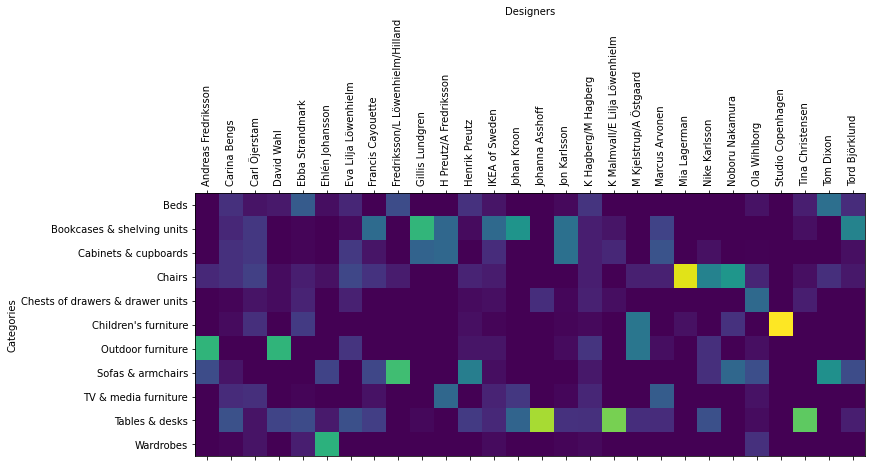

In [135]:
plt.figure(figsize=(12, 6))
plt.matshow(X, fignum=1)
plt.xticks(np.arange(categories_designers.shape[1]), categories_designers.columns.tolist(), rotation=90)
plt.yticks(np.arange(categories_designers.shape[0]), categories_designers.index.tolist())
plt.xlabel('Designers')
plt.gca().xaxis.set_label_position('top')
plt.ylabel('Categories')